## KNN - N Nearest Neighbors

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Carregando a base de dados

In [2]:
iris = pd.read_csv("iris.csv")

### Verificando os atributos

In [3]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


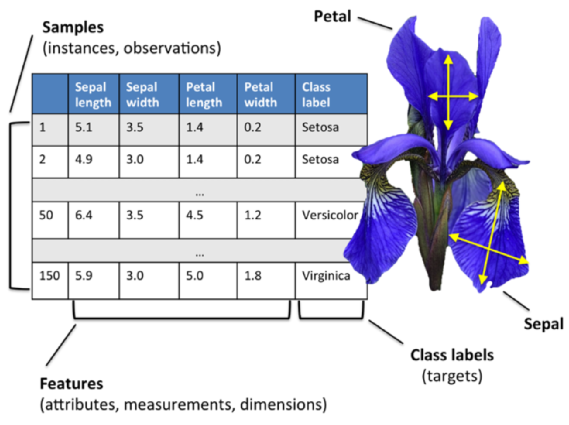

In [4]:
from IPython.display import Image
Image(filename ="iris-data-set.png", width=500, height=500)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Dividindo os dados em treino e teste

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop('Species',axis=1),iris['Species'],test_size=0.3)

### Verificando a forma dos dados

In [10]:
X_train.shape,X_test.shape

,SepalLength,SepalWidth,PetalLength,PetalWidth
138,6.0,3.0,4.8,1.8
88,5.6,3.0,4.1,1.3
53,5.5,2.3,4.0,1.3
93,5.0,2.3,3.3,1.0
52,6.9,3.1,4.9,1.5
...,...,...,...,...
82,5.8,2.7,3.9,1.2
105,7.6,3.0,6.6,2.1
124,6.7,3.3,5.7,2.1
22,4.6,3.6,1.0,0.2


In [11]:
y_train.shape,y_test.shape

138     Iris-virginica
88     Iris-versicolor
53     Iris-versicolor
93     Iris-versicolor
52     Iris-versicolor
            ...       
82     Iris-versicolor
105     Iris-virginica
124     Iris-virginica
22         Iris-setosa
112     Iris-virginica
Name: Species, Length: 105, dtype: object

### Instânciando o algoritmo KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

### Treinando o algoritmo 

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Executando o KNN com o conjunto de teste

In [16]:
resultado = knn.predict(X_test)
resultado

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

### Executando novas amostras

In [15]:
test = np.array([[5.1,3.5,1.4,0.2]])
knn.predict(test),knn.predict_proba(test)

(array(['Iris-setosa'], dtype=object), array([[1., 0., 0.]]))

## Técnicas de Validação

### Matriz de Confusão

In [17]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito  Iris-setosa  Iris-versicolor  Iris-virginica  All
Real                                                                
Iris-setosa                 15                0               0   15
Iris-versicolor              0               12               2   14
Iris-virginica               0                1              15   16
All                         15               13              17   45


### Metricas de classificação

In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=iris['Species'].unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      0.86      0.89        14
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



### Carregando a base de dados - Dígitos

In [1]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt

# The digits dataset
digits = datasets.load_digits()

### Descrição sobre a base de dados

In [2]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### Visualizando os valores de dados

In [3]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

### Visualizando os valores de classes

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Visualizando as imagens e classes

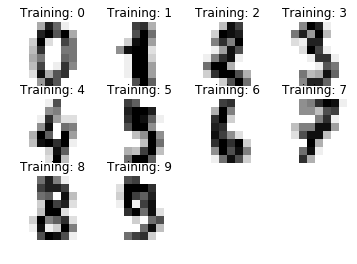

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

### Convertendo os dados em Dataframe

In [9]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
classe = digits.target

In [10]:
dataset = pd.DataFrame(data)
dataset['classe'] = classe

In [11]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,classe
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Dividindo os dados em treino e teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classe',axis=1),dataset['classe'],test_size=0.3)

### Verificando a forma dos dados

In [17]:
X_train.shape,X_test.shape

((1257, 64), (540, 64))

In [18]:
y_train.shape,y_test.shape

((1257,), (540,))

### Instânciando o algoritmo KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)

### Treinando o algoritmo 

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Predizendo novos pontos 

In [29]:
resultado = knn.predict(X_test)

## Técnicas de Validação

### Metricas de classificação

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

             precision    recall  f1-score   support

          0       0.06      0.06      0.06        52
          1       0.08      0.09      0.09        54
          2       0.11      0.12      0.12        49
          3       0.09      0.11      0.10        53
          4       0.10      0.11      0.10        55
          5       0.11      0.07      0.08        61
          6       0.09      0.10      0.09        52
          7       0.12      0.11      0.11        57
          8       0.08      0.07      0.08        54
          9       0.15      0.15      0.15        53

avg / total       0.10      0.10      0.10       540



### Matriz de Confusão

In [38]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0   1   2   3   4   5   6   7   8   9  All
Real                                                          
0                   3   7   8   2   5   4   8   5   5   5   52
1                   3   5   3   7   9   5   4   7   7   4   54
2                   8   1   6   4   8   4   5   4   5   4   49
3                   7   5   8   6   5   3   5   4   4   6   53
4                   7   6   7  11   6   2   2   3   2   9   55
5                   4   7   5  10   6   4   5   8   5   7   61
6                   1   6   6   5   5   5   5   8   8   3   52
7                   6   8   1   9   8   4   5   6   7   3   57
8                   6   8   4   7   8   3   7   4   4   3   54
9                   7   7   6   7   1   2   9   3   3   8   53
All                52  60  54  68  61  36  55  52  50  52  540


### Cross Validation

In [347]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, dataset.drop('classe',axis=1),dataset['classe'], cv=5)
scores

array([0.95604396, 0.95856354, 0.96657382, 0.98319328, 0.96619718])

## Otimizando o Parametro K

### Importando o GridSearch

In [349]:
from sklearn.model_selection import GridSearchCV

### Definindo a lista de valores para o parametro 

In [350]:
k_list = list(range(1,31))

In [352]:
k_values = dict(n_neighbors=k_list)
k_values

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

### Instânciando o objeto GridSearch

In [353]:
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')

### Treinando o objeto

In [354]:
grid.fit(dataset.drop('classe',axis=1),dataset['classe'])

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

### Visualizando os valores de scores

In [356]:
grid.grid_scores_

[mean: 0.96494, std: 0.01285, params: {'n_neighbors': 1},
 mean: 0.96661, std: 0.00627, params: {'n_neighbors': 2},
 mean: 0.96605, std: 0.00949, params: {'n_neighbors': 3},
 mean: 0.96383, std: 0.01070, params: {'n_neighbors': 4},
 mean: 0.96272, std: 0.01094, params: {'n_neighbors': 5},
 mean: 0.95938, std: 0.01047, params: {'n_neighbors': 6},
 mean: 0.95993, std: 0.01487, params: {'n_neighbors': 7},
 mean: 0.95771, std: 0.01444, params: {'n_neighbors': 8},
 mean: 0.95604, std: 0.01681, params: {'n_neighbors': 9},
 mean: 0.95492, std: 0.01653, params: {'n_neighbors': 10},
 mean: 0.95548, std: 0.01538, params: {'n_neighbors': 11},
 mean: 0.95604, std: 0.01460, params: {'n_neighbors': 12},
 mean: 0.95548, std: 0.01560, params: {'n_neighbors': 13},
 mean: 0.95604, std: 0.01308, params: {'n_neighbors': 14},
 mean: 0.95437, std: 0.01433, params: {'n_neighbors': 15},
 mean: 0.95437, std: 0.01412, params: {'n_neighbors': 16},
 mean: 0.95326, std: 0.01075, params: {'n_neighbors': 17},
 mean:

In [357]:
print("Melhor valor de k = {} com o valor {} de acurácia".format(grid.best_params_,grid.best_score_))

Melhor valor de k = {'n_neighbors': 2} com o valor 0.9666110183639399 de acurácia


### Visualização dos valores de K e acurácia

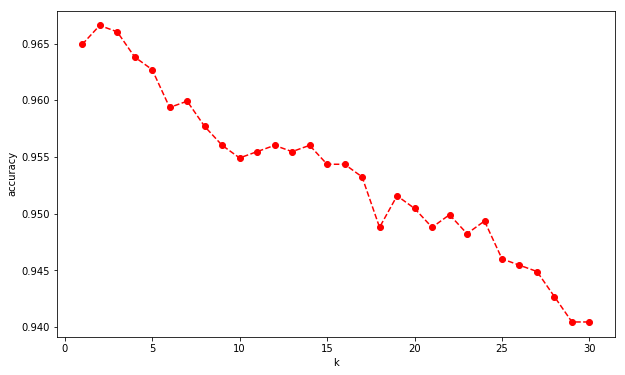

In [358]:
scores=[]
for score in grid.grid_scores_:
    scores.append(score[1])

plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()